In [13]:
import pandas as pd
from ase.visualize import view as view_molecule
from ase.io import read as read_molecule
import ase
import numpy as np
import random


from ase.cell import Cell
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, MBTR

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy.linalg as LA
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')


In [2]:
DATA_PATH = './nomad2018-predict-transparent-conductors'


In [3]:
train_data = pd.read_csv(
    f'{DATA_PATH}/train.csv')
train_data


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


In [4]:
test_data = pd.read_csv(
    f'{DATA_PATH}/test.csv')
test_data



,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,12,80.0,0.0000,0.5938,0.4062,24.8145,6.3964,6.2933,90.0002,104.7733,90.0001
596,597,33,40.0,0.1250,0.0000,0.8750,5.5783,9.4849,10.1107,90.0008,89.9967,90.0004
597,598,194,80.0,0.0000,0.2500,0.7500,6.9377,6.9372,25.0641,90.0072,89.9880,119.9857
598,599,33,40.0,0.6250,0.0000,0.3750,5.1841,8.8659,9.4956,90.0041,90.0009,90.0007


# Visualising the molecule

In [5]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            noise = np.array(
                [random.random()*0.001, random.random()*0.001, random.random()*0.001])
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=float)+noise, x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=float))
    return pos_data, np.array(lat_data)


xyzdata = get_xyz_data(f'{DATA_PATH}/train/10/geometry.xyz')
pos_data = xyzdata[0]
atoms = [ase.Atom(symbol=sym, position=pos) for pos, sym in pos_data]
mol = ase.Atoms(atoms)
# unlike jmol, the bonds are not automatically computed.
# hence, it does not look the same.
view_molecule(mol, viewer='x3d')


# Adding new features to the training data
- CoulombMatrix
- SineMatrix
- EwaldSumMatrix

In [12]:
np.array([1,2,3])+np.array([1,2,3])

array([2, 4, 6])

In [13]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=float), x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=float))
    return pos_data, np.array(lat_data)


get_xyz_data(f'{DATA_PATH}/train/10/geometry.xyz')


([[array([-0.05487074, -0.02429496,  5.9479779 ]), 'Ga'],
  [array([-0.16461223, -0.07288488, 17.84393368]), 'Al'],
  [array([4.59925077, 2.74195764, 6.00133319]), 'Ga'],
  [array([ 4.48950929,  2.69336772, 17.89728898]), 'Ga'],
  [array([3.07074593, 0.01523894, 5.9770041 ]), 'Ga'],
  [array([ 2.96100444, -0.03335098, 17.87295989]), 'Ga'],
  [array([1.4736341 , 2.70242374, 5.97230698]), 'Ga'],
  [array([ 1.36389262,  2.65383382, 17.86826277]), 'Al'],
  [array([0., 0., 0.]), 'Ga'],
  [array([-0.10974148, -0.04858992, 11.89595579]), 'Ga'],
  [array([4.65412151, 2.7662526 , 0.05335529]), 'Ga'],
  [array([ 4.54438003,  2.71766268, 11.94931108]), 'Al'],
  [array([3.12561667, 0.0395339 , 0.0290262 ]), 'Ga'],
  [array([ 3.01587519e+00, -9.05602000e-03,  1.19249820e+01]), 'Al'],
  [array([1.52850484, 2.7267187 , 0.02432909]), 'Al'],
  [array([ 1.41876336,  2.67812878, 11.92028488]), 'Ga'],
  [array([-0.05030208,  1.79230656,  2.98053228]), 'Ga'],
  [array([-0.16004356,  1.74371664, 14.87648807

In [14]:
n_atoms_max = int(train_data['number_of_total_atoms'].max())
n_atoms_max

80

In [13]:
def save_matrices(data, train=True):
    folder = 'train' if train else 'test'
    n_atoms_max = int(data['number_of_total_atoms'].max())
    molecules = []
    for idx in data['id']:
        path = f'{DATA_PATH}/{folder}/{idx}/geometry.xyz'
        xyz_data = get_xyz_data(path)
        pos_data = xyz_data[0]
        lattice_vector_data = xyz_data[1]
        # create molecule
        atoms = [ase.Atom(symbol=sym, position=pos) for pos, sym in pos_data]
        mol = ase.Atoms(atoms)
        mol.set_cell(Cell(lattice_vector_data))
        molecules.append(mol)

    print('Coulomb matrix computation')
    coulomb_matrices = CoulombMatrix(
        n_atoms_max=n_atoms_max,
        permutation="sorted_l2"
    ).create(molecules)
    print('Sine matrix computation')
    sine_matrices = SineMatrix(
        n_atoms_max=n_atoms_max,
        permutation="sorted_l2",
    ).create(molecules, n_jobs=6)
    print('Ewald sum matrix computation')
    ewald_sum_matrices = EwaldSumMatrix(
        n_atoms_max=n_atoms_max,
        permutation="sorted_l2"
    ).create(molecules, n_jobs=6)

    data['CoulombMatrix'] = list(map(list, coulomb_matrices))
    data['SineMatrix'] = list(map(list, sine_matrices))
    data['EwaldSumMatrix'] = list(map(list, ewald_sum_matrices))
    data.to_csv(f'{DATA_PATH}/{folder}_extrainfo.csv', index=False)
    print('Done!')


In [14]:
save_matrices(train_data)
save_matrices(test_data, train=False)

Coulomb matrix computation
Sine matrix computation
Ewald sum matrix computation
Done!
Coulomb matrix computation
Sine matrix computation
Ewald sum matrix computation
Done!


# PCA, basic linear regression

In [5]:
def custom_converter(entry):
    return np.array([float(x) for x in entry[1:-1].split(',')])

In [6]:
train_all_data = pd.read_csv(
    f'{DATA_PATH}/train_extrainfo.csv',
    converters={
        'CoulombMatrix':custom_converter,
        'SineMatrix':custom_converter,
        'EwaldSumMatrix':custom_converter
    }
)
test_all_data = pd.read_csv(
    f'{DATA_PATH}/train_extrainfo.csv',
    converters={
        'CoulombMatrix':custom_converter,
        'SineMatrix':custom_converter,
        'EwaldSumMatrix':custom_converter
    }
)

In [7]:
train_all_data['CoulombMatrix'][0].shape

(6400,)

In [141]:
def get_eigenspectrum(matrix):
    spectrum = LA.eigvalsh(matrix)
    spectrum = np.sort(spectrum)[::-1]
    return spectrum

In [12]:
def compute_values(data, train=True, reg=None, pca_components=None):
    coulomb_spectrum_list = []
    for m in data['CoulombMatrix']:
        coulomb_spectrum_list.append(
            get_eigenspectrum(
                np.reshape(m, (80, 80))
            )
        )
    coulomb_spectrum_df = pd.DataFrame(coulomb_spectrum_list).astype(float)
    coulomb_spectrum_df = coulomb_spectrum_df.fillna(0)
    x = coulomb_spectrum_df.loc[:, :].values
    x = StandardScaler().fit_transform(x)
    y = data.loc[:, ['formation_energy_ev_natom']].values
    pca = PCA(n_components=15).fit(x)

    # PCA n_components calculation
    rolling_sum = 0
    n_components = 1
    for i, num in enumerate(pca.explained_variance_ratio_):
        rolling_sum += num
        if rolling_sum > 0.95:
            n_components = i
            break
    if not train:
        n_components = pca_components
    print(f'Performing PCA with {n_components} components')
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data=principalComponents)


    to_drop = ['id', 'formation_energy_ev_natom', 'bandgap_energy_ev',
               'CoulombMatrix', 'SineMatrix', 'EwaldSumMatrix']
    dfcombined = pd.concat([data, principalDf], axis=1).drop(to_drop, axis=1)
    if train:
        reg = LinearRegression().fit(
            dfcombined, data['formation_energy_ev_natom'])
        score = reg.score(dfcombined, data['formation_energy_ev_natom'])
        print(f'Score: {score}')
        return reg, n_components
    else:
        predicted = reg.predict(dfcombined)
        score = reg.score(dfcombined, data['formation_energy_ev_natom'])
        print(f'Score: {score}')


print('train')
reg, n_components = compute_values(train_all_data)
print('test')
compute_values(test_all_data, train=False,
               reg=reg, pca_components=n_components)



    

train
Performing PCA with 8 components
Score: 0.5709547546659476
test
Performing PCA with 8 components
Score: 0.5709553467978257


# Initial experiments for PCA

In [75]:
coulomb_spectrum_list = []

for m in train_all_data['CoulombMatrix']:
    coulomb_spectrum_list.append(
        get_eigenspectrum(
            np.reshape(m, (80, 80))
        )
    )

In [76]:
len(coulomb_spectrum_list)

2400

In [77]:
coulomb_spectrum_df = pd.DataFrame(coulomb_spectrum_list).astype(float)
coulomb_spectrum_df = coulomb_spectrum_df.fillna(0)

In [78]:
coulomb_spectrum_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,5349.602851,2461.239521,2388.648847,1970.541117,1879.225164,1687.525992,1619.175052,690.315791,382.694878,281.759247,...,-254.221109,-279.491925,-341.168795,-1598.707624,-1719.337606,-1891.363933,-2039.257595,-2489.412981,-2597.658344,-2734.353375
1,4664.284589,2147.704147,1998.326483,1861.937723,1705.065757,1632.157507,1590.650676,1558.539397,1492.408951,654.176290,...,-413.818323,-1496.850075,-1544.594360,-1566.869810,-1623.843803,-1734.106836,-1806.297929,-1858.551919,-2138.280825,-2966.390023
2,2727.840293,1860.393264,1588.639976,552.743019,271.528862,236.206190,186.112399,173.587541,142.254577,131.997692,...,-88.018682,-103.707533,-113.942176,-191.317983,-210.028206,-225.999999,-294.821533,-1639.453896,-1862.887282,-2061.712519
3,7331.966176,5399.736286,4777.992232,515.263061,229.923948,167.807085,159.035142,108.972353,89.962976,75.228578,...,-64.078917,-70.095654,-79.701715,-84.515734,-111.127593,-186.151365,-200.284136,-277.821934,-5098.381131,-6106.631567
4,13920.563231,8054.733954,7661.664683,6149.716107,6011.545351,5412.340292,3381.808318,3010.415735,2539.874212,2055.073656,...,-1276.891091,-1885.121481,-2443.582130,-2766.826523,-3340.846193,-5148.201276,-5570.130342,-7562.216243,-8241.282279,-9085.931438


In [79]:
x = coulomb_spectrum_df.loc[:,:].values
y = train_data.loc[:,['formation_energy_ev_natom']].values
x = StandardScaler().fit_transform(x)

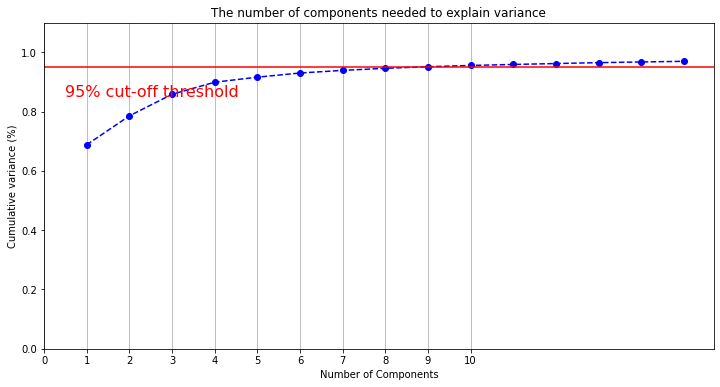

In [80]:
pca = PCA(n_components=15).fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [61]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

reg = LinearRegression().fit(principalDf, train_all_data['formation_energy_ev_natom'])
reg.score(principalDf,train_all_data['formation_energy_ev_natom'])

0.27425986734010366

In [82]:
rolling_sum = 0
n_components = 1
for i, num in enumerate(pca.explained_variance_ratio_):
    rolling_sum+=num
    if rolling_sum>0.95:
        n_components = i
        break
n_components

8

In [62]:
dfcombined = pd.concat([train_all_data, principalDf], axis=1)
dfcombined2 = dfcombined.drop(['id', 'formation_energy_ev_natom', 'bandgap_energy_ev',
                              'CoulombMatrix', 'SineMatrix', 'EwaldSumMatrix'], axis=1)
dfcombined2.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,0,1,2,3,4,5,6,7,8
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,1.263823,-5.072297,-0.521914,0.656162,0.305616,-0.287339,1.114986,-0.058046,-0.626973
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.783753,-4.494103,-1.408993,1.396030,-0.110152,-0.954248,0.596892,0.091588,-0.208111
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,-9.230562,-0.906509,0.380604,1.995215,-0.524765,-0.638662,0.309223,0.430526,0.099772
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,-9.139413,0.436257,0.066397,0.426099,-0.089280,0.342447,-0.761438,-0.802304,0.559301
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,6.606950,0.247992,-0.760569,-1.665921,1.186859,0.344874,-0.221408,-0.388129,-0.414273


In [63]:
reg = LinearRegression().fit(dfcombined2, train_all_data['formation_energy_ev_natom'])
reg.score(dfcombined2,train_all_data['formation_energy_ev_natom'])

/home/rohan/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/home/rohan/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.5804629943236383

## Try prediction on test data

2400


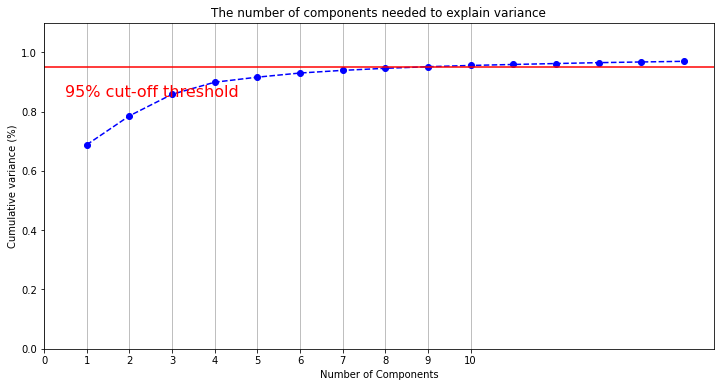

In [64]:
## try for test data
coulomb_spectrum_list = []

for m in test_all_data['CoulombMatrix']:
    coulomb_spectrum_list.append(
        get_eigenspectrum(
            np.reshape(m, (80, 80))
        )
    )
print(len(coulomb_spectrum_list))
coulomb_spectrum_df = pd.DataFrame(coulomb_spectrum_list).astype(float)
coulomb_spectrum_df = coulomb_spectrum_df.fillna(0)

x = coulomb_spectrum_df.loc[:, :].values
y = train_data.loc[:, ['formation_energy_ev_natom']].values
x = StandardScaler().fit_transform(x)

# PCA elbow plot
pca = PCA(n_components=15).fit(x)
plt.rcParams["figure.figsize"] = (12, 6)
fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
# change from 0-based array index to 1-based human-readable label
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()



In [71]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents)
dfcombined = pd.concat([train_all_data, principalDf], axis=1)
dfcombined2 = dfcombined.drop(['id', 'formation_energy_ev_natom', 'bandgap_energy_ev',
                              'CoulombMatrix', 'SineMatrix', 'EwaldSumMatrix'], axis=1)
dfcombined2.head()


,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,0,1,2,3,4,5,6,7,8
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,1.263823,-5.072297,-0.521914,0.656163,0.305605,-0.287301,1.115199,-0.057993,-0.629195
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.783753,-4.494104,-1.408993,1.396030,-0.110112,-0.954281,0.596757,0.091337,-0.202892
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,-9.230562,-0.906509,0.380604,1.995217,-0.524792,-0.638637,0.309322,0.429114,0.098502
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,-9.139413,0.436257,0.066397,0.426099,-0.089274,0.342493,-0.761237,-0.801438,0.558088
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,6.606950,0.247992,-0.760569,-1.665923,1.186825,0.344869,-0.221604,-0.386250,-0.419988


In [85]:
dfcombined2

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,0,1,2,3,4,5,6,7,8
0,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,1.263823,-5.072297,-0.521914,0.656163,0.305605,-0.287301,1.115199,-0.057993,-0.629195
1,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.783753,-4.494104,-1.408993,1.396030,-0.110112,-0.954281,0.596757,0.091337,-0.202892
2,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,-9.230562,-0.906509,0.380604,1.995217,-0.524792,-0.638637,0.309322,0.429114,0.098502
3,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,-9.139413,0.436257,0.066397,0.426099,-0.089274,0.342493,-0.761237,-0.801438,0.558088
4,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,6.606950,0.247992,-0.760569,-1.665923,1.186825,0.344869,-0.221604,-0.386250,-0.419988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,-9.136348,-0.853656,0.211182,1.880084,-0.630561,-0.418699,0.339814,0.309851,0.212723
2396,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,-9.616203,-0.862042,0.247975,1.601959,-0.695168,-0.512695,-0.116401,0.295207,-0.115726
2397,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,2.528789,-5.066986,1.418731,0.806064,-0.756565,-0.464884,0.635334,-0.196761,-0.113510
2398,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,7.373242,1.293328,5.125365,-3.034217,-1.951673,0.098405,-1.268647,1.245847,0.105600


In [73]:
# use the last regression to predict
reg.predict(dfcombined2)
reg.score(dfcombined2, test_all_data['formation_energy_ev_natom'])


/home/rohan/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/home/rohan/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.5804866163795679